# Lecture DFT 3
---

- [Spectral Leackage](#Spectral-Leackage)
- [2D Discrete Fourier Transform](#2D-Discrete-Fourier-Transform)
- [Short Time FFT](#Short-Time-FFT)

This lecture will introduce and discuss the follwing topics

- **spectral leakage** and methods how to circumvent this effect
- **2 Dimensional DFT** and its application (e.g. jpeg compression)
- **short time fft** and its application (e.g. Shazam and speech recognition)

### Spectral Leackage

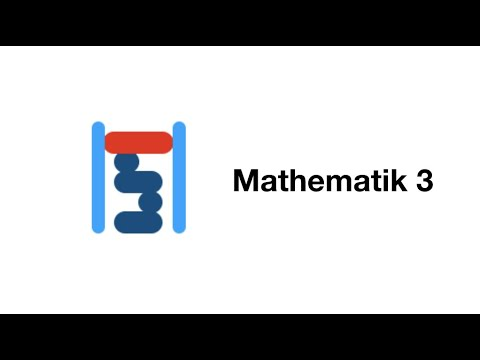

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('ai_v23RiXVU', width=380, height=220)

The term describes the fact that, due to the finite observation period of a signal, in the frequency spectrum may be frequency components which would not occur in a theoretically infinitely long observation period. Consider the following example of a signal
$$
f(t) = \sin(2\pi f_1t),\quad \mathrm{with}\quad f_1 = 3\mathrm{Hz}
$$
If we sample this signal over a period of $T=1.8$s (with $f_s=60$Hz) you realize
that the spectrum contains not a single peak at the frequency $f=f_1$ but there is some **leackage** of the spectrum around this frequency. This leackage can be avoided by either

- Sample longer (i.e. enhance the period $T$)
- Use a window function (e.g. a Hann Window as shown belows)

20.0


<Figure size 1440x1440 with 0 Axes>

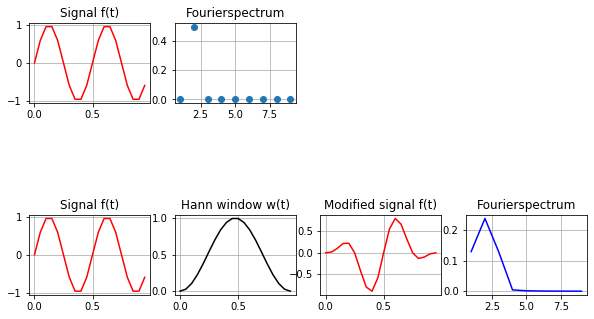

In [18]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))

f_1 = 2
f_s = 20
T = 1.0
N = f_s*T
hanning = True
print(N)
t = np.arange(0,T,1/f_s)
f = np.sin(2*np.pi*f_1*t)
# window the signal with a Hann window (so called "hanning")
h = np.sin(np.pi*np.arange(N)/(N-1))**2
fh = f*h

c = np.fft.fftshift(np.fft.fft(f))
ch = np.fft.fftshift(np.fft.fft(fh))
freq = np.arange(-f_s/2,f_s/2,1/T)
plt.figure(figsize=(10,5))
plt.subplot(3, 4, 1)
plt.plot(t,f,'r')
plt.title('Signal f(t)')
plt.grid()
plt.subplot(3, 4, 2)
plt.plot(freq[freq>0],1/N*np.abs(c[freq>0]),'o')
plt.grid()
plt.title('Fourierspectrum')
if hanning:
    plt.subplot(3, 4, 9)
    plt.plot(t,f,'r')
    plt.title('Signal f(t)')
    plt.grid()
    plt.subplot(3, 4,10)
    plt.plot(t,h,'black')
    plt.grid()
    plt.title('Hann window w(t)')
    plt.subplot(3, 4, 11)
    plt.plot(t,fh,'r')
    plt.title('Modified signal f(t)')
    plt.grid()
    plt.subplot(3, 4, 12)
    plt.plot(freq[freq>0],1/N*np.abs(ch[freq>0]),'b')
    plt.grid()
    plt.title('Fourierspectrum')

### 2D Discrete Fourier Transform

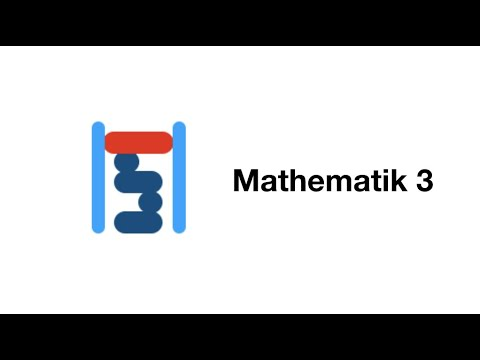

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('yKpcZEPRLm8', width=380, height=220)

The one dimensional DFT considered so far can easily be transferred to two (or even more) dimension. Instead of having a one-dimensional input Vektor $f_k,\, k=0,1,\ldots,N-1$ we now deal with a two-dimensional input matrix
$$
f_{k,l},\quad 0\leq k,l\leq N-1\,.
$$
To give an example, consider the following grayscale image (with size $512\times 512$ and color depth 8 bit).



In [19]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def plot_lena(z):
    plt.figure(figsize=(10,3))
    A = plt.imread('Lena.png')
    B = plt.imread('Lena.png')
    B[z-1:z+2,:]=0
    # Plot image
    plt.subplot(1, 3, 1)
    plt.imshow(B,cmap='gray')
    plt.subplot(1, 3, 2)
    plt.plot(A[z,:],'black')
    plt.grid()
    plt.axis([0,511,0,1])

z = widgets.IntSlider(min=0, max=511, step=10, value=255)
#interact(plot_lena, z = z) 

ui = widgets.HBox([z])
out = widgets.interactive_output(plot_lena, {'z': z} )
display(out, ui)

Output()

You may imagine this image to consist of 512 horizontal line cuts along each row (the one at row 255 is shown in the right figure above). For each line cut you may perform a DFT seperately or put is all together as
$$
c_{n,m} = \sum_{k=0}^{N-1}\sum_{l=0}^{N-1} f_{k,l}e^{-i\frac{2\pi}{N}(nk+ml)}
$$

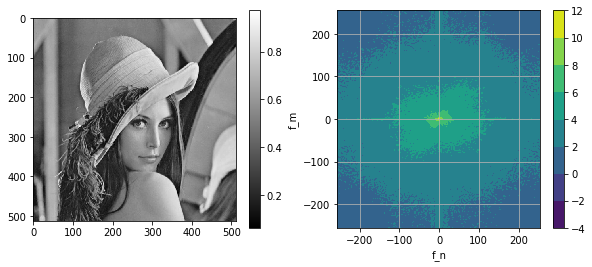

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import  fft2, fftshift

A = plt.imread('Lena.png')
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.imshow(A,cmap='gray')
plt.colorbar()
# Perform 2D-FFT
c = fftshift(fft2(A))
fx,fy = np.meshgrid(np.arange(-256,256,1),np.arange(-256,256,1))
# Plot 2D-Spectrum
plt.subplot(1, 2, 2)
#plt.contourf(fx,fy,np.abs(c))
plt.contourf(fx,fy,np.log(np.abs(c)))
plt.xlabel('f_n')
plt.ylabel('f_m')
plt.colorbar()
plt.grid()

The real and imaginary parts of the basis functions
$$
b_{n,m} = e^{-i\frac{2\pi}{N}(nk+ml)}
$$
may be visualized as follows.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

N = 512
n = 2
m = 4
l,k = np.meshgrid(np.arange(N),np.arange(N))

# Plot the real part of the 2D base functions

#fig = plt.figure()
#ax = fig.gca(projection='3d')
#ax.plot_surface(k,l,np.cos(2*np.pi/N*(n*k+m*l)))
def plot_basis_function(n,m):
    plt.figure(figsize=(5,5))
    plt.contourf(k,l,np.cos(2*np.pi/N*(n*k+m*l)),cmap='gray')
    plt.title('Basis function: b_{}_{}'.format(np.int(n),m))
    plt.colorbar()
    plt.xlabel('n')
    plt.ylabel('m')

n = widgets.FloatSlider(min=0, max=10, step=1, value=1)
m = widgets.IntSlider(min=0, max=10, step=1, value=0)
#interact(plot_basis_function,n=n,m=m)

ui = widgets.HBox([n, m])
out = widgets.interactive_output(plot_basis_function, {'n': n, 'm': m} )

display(out, ui)

Output()

### Short Time FFT

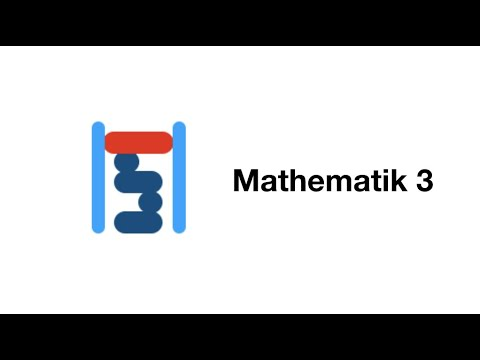

In [7]:
from IPython.display import YouTubeVideo
YouTubeVideo('ocFS8vOlNsw', width=380, height=220)

The **short-time Fourier transform** (STFT) is used to determine the frequency local sections of a signal as it changes over time. In practice, the procedure for computing STFTs is to divide a longer time signal into shorter segments of equal length and then compute the Fourier transform separately on each shorter segment. This reveals the Fourier spectrum on each shorter segment. One then usually plots the changing spectra as a function of time. 

In the example below we show a pure tone over $T=2$s, which continously increases its frequency from 0 to 1800Hz.

In [41]:
from  scipy import signal
from scipy.io.wavfile import write, read
from IPython.display import Audio
from numpy.fft import fft, ifft, fftshift, ifftshift

f_s, T = 4000, 2
N = f_s*T
f_low, f_high = 0, 1800
t = np.arange(0,T,1/f_s)
s = signal.chirp(t,f_low,T,f_high)
s = np.flip(s)
write('tmp1.wav',f_s,s.astype('float32'))
Audio('tmp1.wav')

Text(0.5, 0, 'Frequency [Hz]')

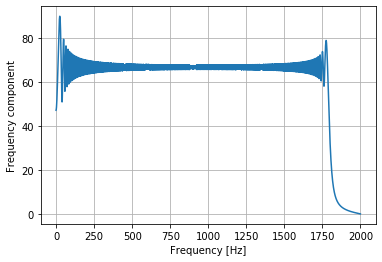

In [42]:
freq = np.arange(-f_s/2,f_s/2,1/T)
c    = fftshift(fft(s))

m = np.int(N/2)
plt.plot(freq[m:],np.abs(c[m:]))
plt.grid()

plt.ylabel('Frequency component')
plt.xlabel('Frequency [Hz]')

Text(0.5, 0, 'Time [sec]')

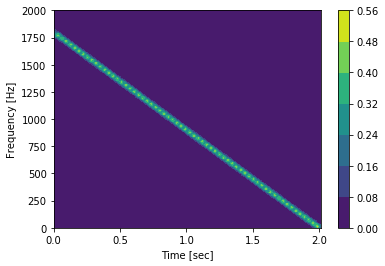

In [44]:
# Calculate spectrogram
#f,t,S = signal.spectrogram(s,f_s)
f,t,c = signal.stft(s,f_s)

plt.contourf(t, f, np.abs(c))
plt.colorbar()
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')